<a href="https://colab.research.google.com/github/annahunn20/Infosys_springboard-6.0-assignments/blob/main/CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# 2. Filter: Keep only T-shirt (0) and Sneaker (7)
train_idx = np.where((y_train == 0) | (y_train == 7))[0]
test_idx = np.where((y_test == 0) | (y_test == 7))[0]

In [5]:
x_train, y_train = x_train[train_idx], y_train[train_idx]
x_test, y_test = x_test[test_idx], y_test[test_idx]


In [6]:
# 3. Relabel → T-shirt = 0, Sneaker = 1
y_train = (y_train == 7).astype(int)
y_test = (y_test == 7).astype(int)

In [7]:
# 4. Normalize & reshape (CNN expects 4D input)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, -1)  # shape: (28,28,1)
x_test = np.expand_dims(x_test, -1)

In [17]:
# 5. Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

In [18]:
# 6. Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
# 7. Train
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9890 - loss: 0.0650 - val_accuracy: 0.9985 - val_loss: 0.0027
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9980 - val_loss: 0.0066
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9990 - val_loss: 0.0012
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9999 - loss: 3.2574e-04 - val_accuracy: 0.9990 - val_loss: 0.0027
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9993 - loss: 0.0012 - val_accuracy: 0.9990 - val_loss: 0.0023


In [20]:
# 8. Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("✅ Test Accuracy:", acc)

✅ Test Accuracy: 0.9990000128746033


In [21]:
# 9. Predict some random test images
indices = np.random.choice(len(x_test), 10, replace=False)
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

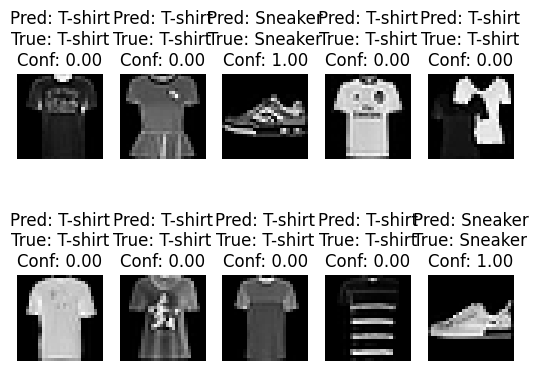

In [22]:
for i, idx in enumerate(indices):
    img, true_label = x_test[idx], y_test[idx]
    pred_prob = model.predict(np.expand_dims(img, axis=0), verbose=0)[0][0]
    pred_class = 1 if pred_prob > 0.5 else 0

    plt.subplot(2, 5, i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"Pred: {'Sneaker' if pred_class==1 else 'T-shirt'}\n"
              f"True: {'Sneaker' if true_label==1 else 'T-shirt'}\n"
              f"Conf: {pred_prob:.2f}")

In [16]:
plt.show()